# Imports

In [1]:
import numpy as np
import pandas as pd
import sqlalchemy

import os
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

In [2]:
from functions import load_balanced_df

In [3]:
balanced_df = load_balanced_df(sample_size=1000)
balanced_df.shape

(22000, 83)

Change all benign lables to simply 'benign'

In [4]:
benign_filt = balanced_df['Malicious'] == 0
balanced_df['Label'] = np.where(benign_filt, 'Benign', balanced_df['Label'])

Check target distributions


In [5]:
balanced_df['Malicious'].value_counts()

1    11000
0    11000
Name: Malicious, dtype: int64

In [6]:
balanced_df['Label'].value_counts()

Benign     11000
UDP         1000
MSSQL       1000
SSDP        1000
DNS         1000
Portmap     1000
TFTP        1000
SNMP        1000
NetBIOS     1000
NTP         1000
Syn         1000
LDAP        1000
Name: Label, dtype: int64

Model results

In [7]:
model_scores = pd.read_csv('Model_Scores.csv', index_col=0)

In [8]:
feature_importances = pd.read_csv('Feature_Importances.csv', index_col=0)

# Feature Importances

In [9]:
model_scores

,Score,Bal_Binary_Dummy,Bal_Binary_GNB,Bal_Binary_DT,Bal_Binary_KNN,Bal_Binary_RF,Bal_Binary_XGB,Bal_Multicalss_Dummy,Bal_Multiclass_GNB,Bal_Multiclass_DT,Bal_Multiclass_KNN,Bal_Multiclass_RF,Bal_Multiclass_XGB
0,Accuracy,0.512182,0.822364,0.999091,0.997273,0.998727,1.0,0.000000,0.661636,0.924000,0.919636,0.928000,0.929455
1,F1_Score,0.512979,0.843855,0.999083,0.997254,0.998715,1.0,0.273325,0.843855,0.932673,0.926212,0.936837,0.938113


In [10]:
feature_importances.head()

,Feature,Bal_Binary_DT,Bal_Binary_RF,Bal_Binary_XGB,Bal_Multiclass_DT,Bal_Multiclass_RF,Bal_Multiclass_XGB
0,Feature_1,"('Fwd_Init_Win_Bytes', 0.6428306338135531)","('Fwd_Init_Win_Bytes', 0.13006379633919796)","('Pkt_Size_Mean', 0.36486617)","('Fwd_Init_Win_Bytes', 0.3760219415463435)","('Fwd_Init_Win_Bytes', 0.09528108518799236)","('Time_Idle_Std', 0.5322768)"
1,Feature_2,"('Pkt_Size_Mean', 0.1930210912747058)","('TCP', 0.07753190823840336)","('CWE_Flag_Count', 0.14011626)","('Pkt_Size_Mean', 0.2068695948593409)","('Pkt_Length_Min', 0.05587349828782531)","('CWE_Flag_Count', 0.09333151)"
2,Feature_3,"('ACK_Flag_Count', 0.06833403894335129)","('Pkt_Length_Min', 0.06621859113300392)","('Fwd_Init_Win_Bytes', 0.13416831)","('Pkt_Length_Max', 0.07462927073131587)","('Pkt_Size_Mean', 0.04205806720737576)","('Fwd_Pkt_Length_Std', 0.060551565)"
3,Feature_4,"('URG_Flag_Count', 0.018841893148837326)","('UDP', 0.05545832025128266)","('Fwd_Seg_Size_Min', 0.116157554)","('Fwd_Pkt_Length_Min', 0.06567930518050154)","('Fwd_Pkt_Length_Min', 0.042047606803231656)","('Fwd_Init_Win_Bytes', 0.039122608)"
4,Feature_5,"('Fwd_IAT_Std', 0.0170630742980684)","('PSH_Flag_Count', 0.04537413078590603)","('Fwd_PSH_Flags', 0.06968633)","('Fwd_IAT_Max', 0.05131909490594675)","('TCP', 0.04123283077516715)","('Pkt_Length_Min', 0.034679733)"


Most important features across all models

In [11]:
important_features = ['Fwd_Init_Win_Bytes', 'Pkt_Size_Mean', 'Time_Idle_Std', 'Pkt_Length_Mean', 'Pkt_Length_Min',
                      'Pkt_Length_Max', 'CWE_Flag_Count', 'TCP', 'UDP']
important_features

['Fwd_Init_Win_Bytes',
 'Pkt_Size_Mean',
 'Time_Idle_Std',
 'Pkt_Length_Mean',
 'Pkt_Length_Min',
 'Pkt_Length_Max',
 'CWE_Flag_Count',
 'TCP',
 'UDP']

## Protocol EDA

Text(0, 0.5, 'Num Data Flows')

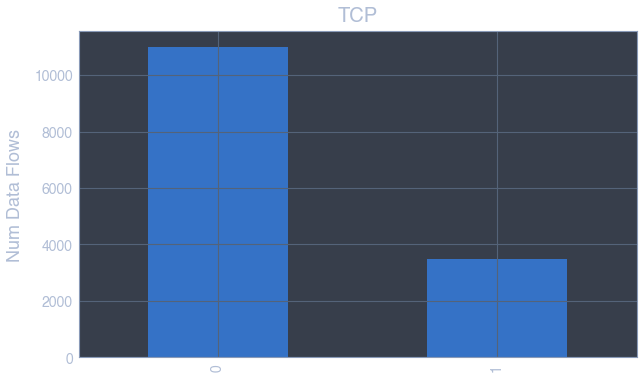

In [12]:
plot = balanced_df[balanced_df['TCP'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('TCP', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
#plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

Text(0, 0.5, 'Num Data Flows')

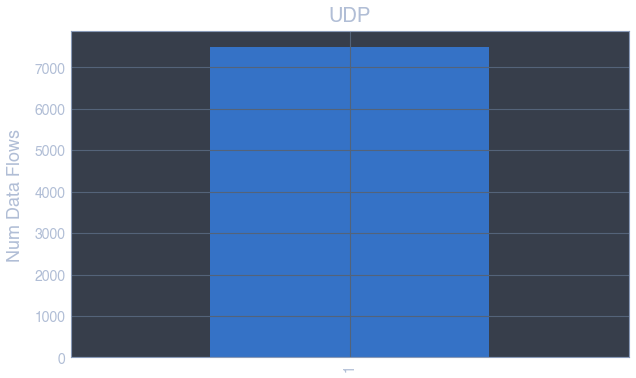

In [13]:
plot = balanced_df[balanced_df['UDP'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('UDP', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
#plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

Text(0, 0.5, 'Num Data Flows')

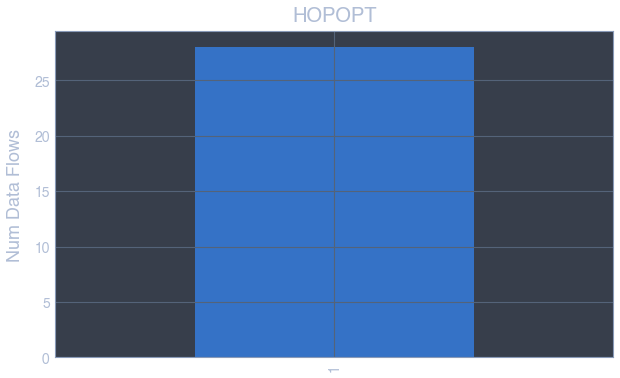

In [14]:
plot = balanced_df[balanced_df['HOPOPT'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('HOPOPT', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
#plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

Most of the benign data collected is TCP, but there is still enough benign UDP in the dataset.

The majority of DDOS attacks use UDP, but some can be executed over TCP.

Almost 

# Initial Flow Window EDA

In [15]:
balanced_df[balanced_df['Malicious'] == 0]['Fwd_Init_Win_Bytes'].describe()

count    11000.000000
mean      9997.901273
std      15485.562218
min          0.000000
25%        327.000000
50%       8192.000000
75%      14600.000000
max      65535.000000
Name: Fwd_Init_Win_Bytes, dtype: float64

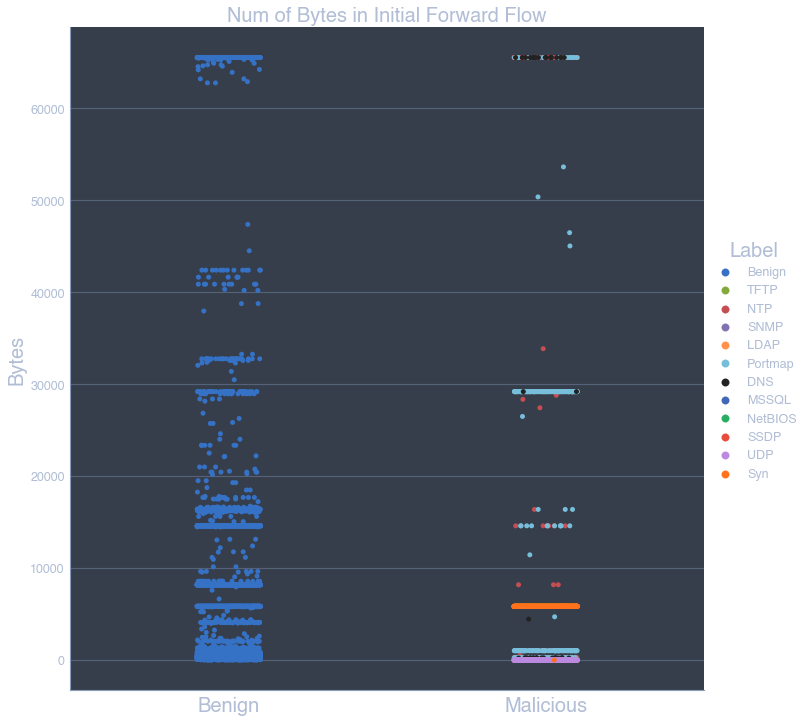

In [16]:
plot = sns.catplot(x='Malicious', y='Fwd_Init_Win_Bytes', hue='Label', data=balanced_df, height=10, aspect=1)

plt.title('Num of Bytes in Initial Forward Flow', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

In [ ]:
# LDA topic distribution over time
topics_over_time = df.groupby('date').lda.value_counts(normalize=True).unstack()

p1 = topics_over_time.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Topic Distribution Over Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Percentage of Tweets', fontsize=18, labelpad=10)
p1.legend(['lda_0', 'lda_1','lda_2', 'lda_3', 'lda_4'], facecolor='white',
          framealpha=1, bbox_to_anchor=(1.01, 1.0), loc='upper left')

# plt.savefig('Images/topic_distribution_over_time.png', dpi = 100)

# SQL

In [25]:
engine = sqlalchemy.create_engine('sqlite:///test.sqlite')

In [26]:
df.to_sql(name='test', con=engine, if_exists='replace')